# Dataset para a PI

## Imports necessários

In [ ]:
import pandas as pd # Criação de dataframes
from io import StringIO # manipulaimport requests # Fazer uma solicitação HTTP
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('df_1.csv')
df.drop(['Sources'], axis=1, inplace=True)
display(df)

,Unnamed: 0,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
350,350,50 companies and government institutions,2022,6400000,various,poor security




## Tratamento dos dados


In [ ]:
# Dicionário para categorizar os incidentes de acordo com palavras-chave
categorias = {
    'Incidentes relacionados a hacking': ['hacked', 'credential', 'trojan', 'ransomware'],
    'Exposição de dados/Má configuração': ['published', 'exposed', 'misconfigured', 'unsecured'],
    'Ameaças internas': ['inside job', 'insider', 'rogue', 'employee', 'poor security'],
    'Furto físico/Perda': ['lost', 'stolen', 'magnetic tape'],
    'Engenharia social': ['phishing', 'social engineering'],
    'Outro': []
}

# Dicionário para definir os níveis de ameaça baseados nas categorias
threat_levels = {
    'alto': ['Incidentes relacionados a hacking', 'Engenharia social'],
    'medio': ['Exposição de dados/Má configuração', 'Furto físico/Perda'],
    'baixo': ['Ameaças internas'],
    'desconhecido': ['Outro']
}

# Função para categorizar os incidentes
def categorize_incident(method):
    if pd.isna(method):  # Verifica se o valor é NA
        return 'Outro'  # Retorna 'Outro' se o valor for NA
    for categoria, keywords in categorias.items():
        if any(keyword in method.lower() for keyword in keywords):
            return categoria
    return 'Outro'  # Retorna 'Outro' se nenhuma palavra-chave corresponder

# Função para categorizar o nível de ameaça
def categorize_threat_level(categoria):
    for level, categories in threat_levels.items():
        if categoria in categories:
            return level
    return 'desconhecido'  # Retorna 'desconhecido' se a categoria não estiver listada

# Aplica as funções para criar as colunas 'categoria' e 'nivel_ameaca'
df['categoria'] = df['Method'].apply(categorize_incident)
df['nivel_ameaca'] = df['categoria'].apply(categorize_threat_level)
df = df[df['Year'] != "2019-2020"]
df = df[df['Year'] != "2018-2019"]
df = df[df['Year'] != "2014 and 2015"]

# Converte a coluna para numérico, transformando strings não numéricas em NaN
df['Records'] = pd.to_numeric(df['Records'], errors='coerce')

# Remove as linhas com NaN
df = df.dropna(subset=['Records'])

df['Records'] = pd.to_numeric(df['Records'])

df = df.reset_index(drop=True)
# Exibe o DataFrame final com as novas colunas
display(df)

<ipython-input-5-e4f19d70859c>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Records'] = pd.to_numeric(df['Records'])


,Unnamed: 0,Entity,Year,Records,Organization type,Method,categoria,nivel_ameaca
0,0,21st Century Oncology,2016,2200000.0,healthcare,hacked,Incidentes relacionados a hacking,alto
1,1,500px,2020,14870304.0,social networking,hacked,Incidentes relacionados a hacking,alto
2,2,Accendo Insurance Co.,2020,175350.0,healthcare,poor security,Ameaças internas,baixo
3,3,Adobe Systems Incorporated,2013,152000000.0,tech,hacked,Incidentes relacionados a hacking,alto
4,4,Adobe Inc.,2019,7500000.0,tech,poor security,Ameaças internas,baixo
...,...,...,...,...,...,...,...,...
298,347,Zynga,2019,173000000.0,social network,hacked,Incidentes relacionados a hacking,alto
299,348,Unknown agency(believed to be tied to United S...,2020,200000000.0,financial,accidentally published,Exposição de dados/Má configuração,medio
300,349,National Health Information Center (NCZI) of S...,2020,391250.0,healthcare,poor security,Ameaças internas,baixo
301,350,50 companies and government institutions,2022,6400000.0,various,poor security,Ameaças internas,baixo


## Análise da tabela

Soma de todos os incidentes do Dataset

In [ ]:
record_count = df["Records"].sum()

record_count


13355968650.0

In [ ]:
contado_anos = df['Year'].value_counts()
contado_anos

,count
Year,
2011,33
2013,26
2019,26
2020,24
2012,22
2018,22
2010,19
2015,19
2014,18


In [ ]:
indice = df.loc[df['Year'] == "2019-2020"].index
indice

Index([], dtype='int64')

In [ ]:
indice = df.loc[df['Year'] == "2018-2019"].index
indice

Index([], dtype='int64')

In [ ]:
indice = df.loc[df['Year'] == "2014 and 2015"].index
indice

Index([], dtype='int64')

In [ ]:
contado_metodos = df['Method'].value_counts()
contado_metodos

,count
Method,
hacked,157
poor security,39
lost / stolen media,32
accidentally published,18
inside job,18
lost / stolen computer,15
unknown,5
"improper setting, hacked",2
poor security/inside job,2


<ipython-input-12-798dae1a5634>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Method', data=df[df['Method'].isin(top_10_métodos)],


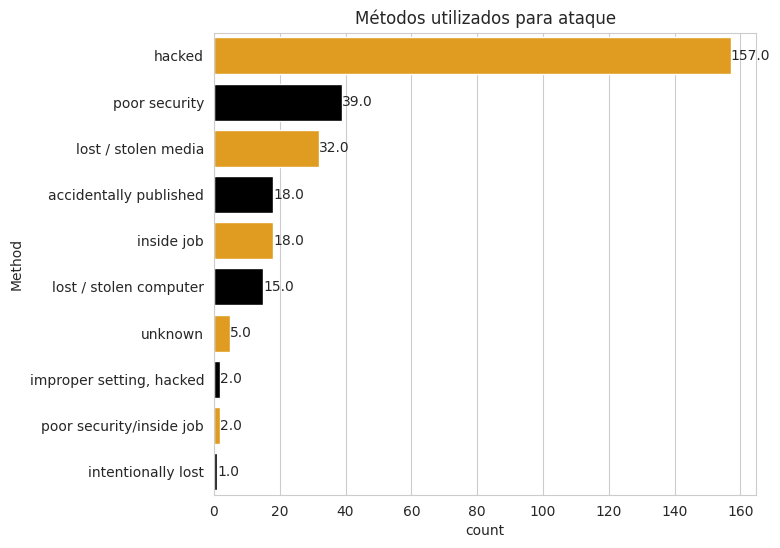

In [ ]:
# Contar os métodos e obter os 10 mais comuns
top_10_métodos = df['Method'].value_counts().nlargest(10).index

plt.figure(figsize=(7, 6))  # Ajusta o tamanho do gráfico
sns.set_style('whitegrid')  # Aplica um estilo

# Cria o gráfico com os 10 métodos mais comuns, usando cores laranja e cinza
colors = ['orange', 'black'] * (len(top_10_métodos) // 2 + 1)
ax = sns.countplot(y='Method', data=df[df['Method'].isin(top_10_métodos)],
                   order=top_10_métodos, palette=colors[:len(top_10_métodos)])

# Adiciona título
plt.title('Métodos utilizados para ataque')

# Adiciona anotações
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)

plt.show()


<ipython-input-13-d98bf1232c53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Method', data=df_nothacked[df_nothacked['Method'].isin(top_10_nothacked)],


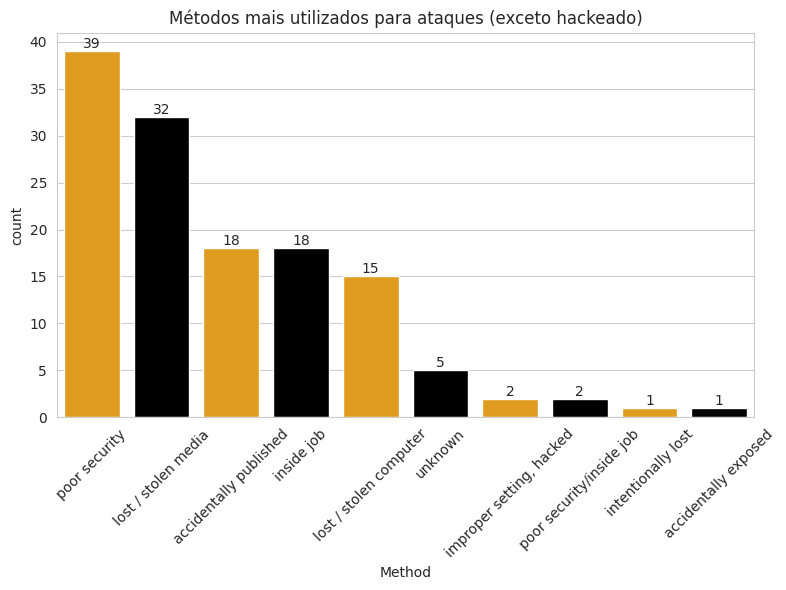

In [ ]:
# Filtra os dados sem o método 'hacked'
df_nothacked = df.loc[df['Method'] != 'hacked']
top_10_nothacked = df_nothacked['Method'].value_counts().nlargest(10).index

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Define as cores
colors = ['orange', 'black'] * (len(top_10_nothacked) // 2 + 1)

# Cria o gráfico
ax = sns.countplot(x='Method', data=df_nothacked[df_nothacked['Method'].isin(top_10_nothacked)],
                   order=top_10_nothacked, palette=colors[:len(top_10_nothacked)])

# Adiciona o título
plt.title('Métodos mais utilizados para ataques (exceto hackeado)')

# Adiciona anotações
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                va='bottom', ha='center', fontsize=10)

# Ajusta os rótulos do eixo x
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
contador_tipo_org = df['Organization type'].value_counts()
contador_tipo_org.head(23)

,count
Organization type,
web,49
healthcare,46
financial,36
government,27
retail,21
tech,14
telecoms,12
academic,12
gaming,10


<ipython-input-15-4e5421bc927d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10.index, y=top_10.values, palette=colors[:len(top_10)])


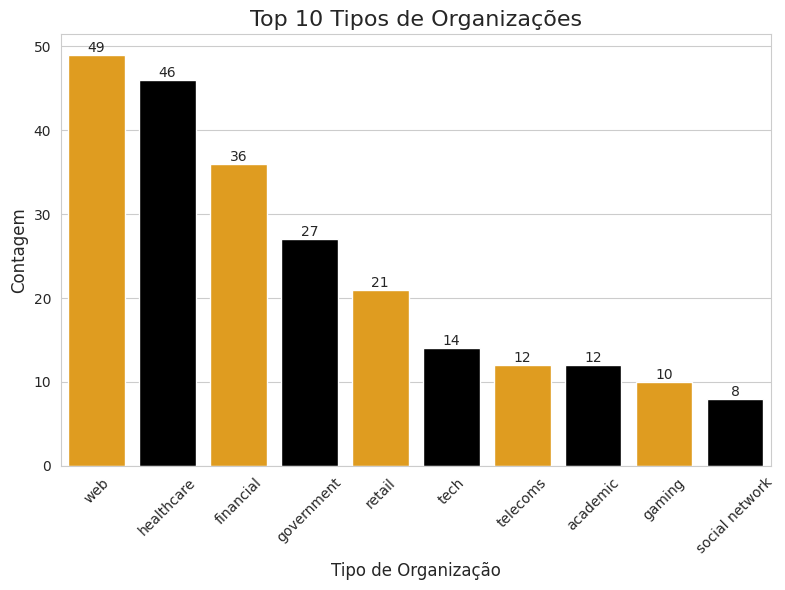

In [ ]:

top_10 = contador_tipo_org.head(10)

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Define as cores
colors = ['orange', 'black'] * (len(top_10) // 2 + 1)

# Cria o gráfico
ax = sns.barplot(x=top_10.index, y=top_10.values, palette=colors[:len(top_10)])

# Adiciona título e rótulos
plt.title('Top 10 Tipos de Organizações', fontsize=16)
plt.xlabel('Tipo de Organização', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Adiciona anotações
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                va='bottom', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
table_year_df = df['Year'].value_counts()
table_year_df

,count
Year,
2011,33
2013,26
2019,26
2020,24
2012,22
2018,22
2010,19
2015,19
2014,18


<ipython-input-17-8f7ec7d04c7c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Year', data=df, order=anos_ordenados, palette=colors[:len(anos_ordenados)])


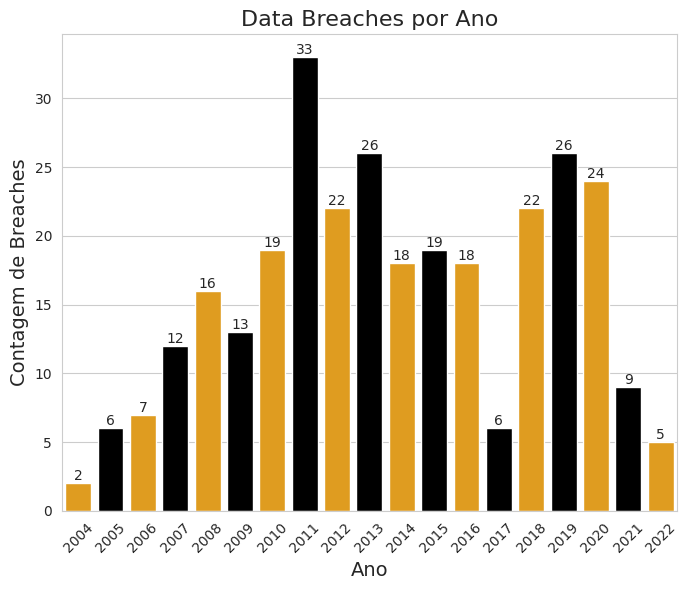

In [ ]:
# Ordena os anos
anos_ordenados = sorted(df['Year'].unique())

plt.figure(figsize=(7, 6))  # Ajusta o tamanho do gráfico
sns.set_style('whitegrid')  # Aplica um estilo

# Define as cores laranja e preto
colors = ['orange', 'black'] * (len(anos_ordenados) // 2 + 1)

# Cria o gráfico de contagem com os anos ordenados
ax = sns.countplot(x='Year', data=df, order=anos_ordenados, palette=colors[:len(anos_ordenados)])

# Adiciona título e rótulos
plt.title('Data Breaches por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Contagem de Breaches', fontsize=14)

# Adiciona anotações nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                va='bottom', ha='center', fontsize=10)

plt.xticks(rotation=45)  # Rótulos na diagonal
plt.tight_layout()  # Ajusta o layout
plt.show()


<ipython-input-18-fa53e61161c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, order=table_year_df.index.values, palette='viridis');


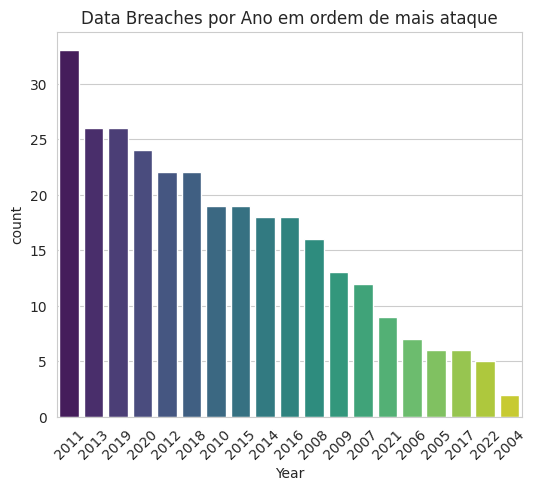

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Year', data=df, order=table_year_df.index.values, palette='viridis');
plt.title('Data Breaches por Ano em ordem de mais ataque')
plt.xticks(rotation=45);

<ipython-input-19-49cab505847b>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem = f'{(contagem[i] / contagem.sum()) * 100:.1f}%'  # Formatação da porcentagem


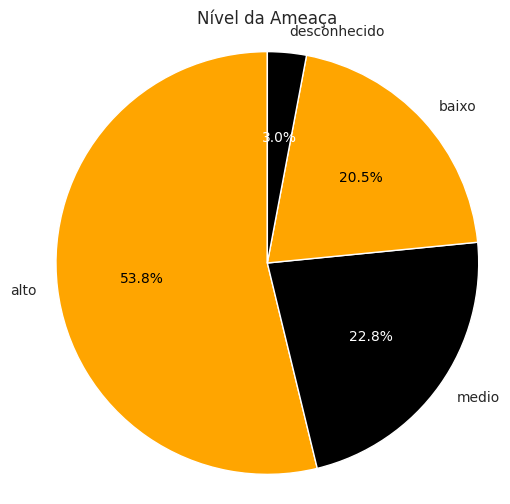

In [ ]:
# Contagem dos níveis de ameaça
contagem = df['nivel_ameaca'].value_counts()

plt.figure(figsize=(6, 6))

# Define as cores laranja e cinza
cores = ['orange', 'black'] * (len(contagem) // 2 + 1)

# Cria o gráfico de pizza
wedges, texts, autotexts = plt.pie(contagem, labels=contagem.index, autopct='', startangle=90, colors=cores[:len(contagem)])

# Adiciona as porcentagens manualmente e ajusta a cor do texto
for i, a in enumerate(autotexts):
    porcentagem = f'{(contagem[i] / contagem.sum()) * 100:.1f}%'  # Formatação da porcentagem
    a.set_text(porcentagem)  # Define apenas a porcentagem

    # Define a cor do texto com base na cor da fatia
    if cores[i] == 'black':
        a.set_color('white')  # Para a fatia cinza, texto branco
    else:
        a.set_color('black')  # Para a fatia laranja, texto preto

plt.title('Nível da Ameaça')
plt.axis('equal')  # Faz o gráfico de pizza ser um círculo
plt.show()


<ipython-input-20-292b516490a5>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem = f'{(registros_categoria[i] / registros_categoria.sum()) * 100:.1f}%'  # Formatação da porcentagem


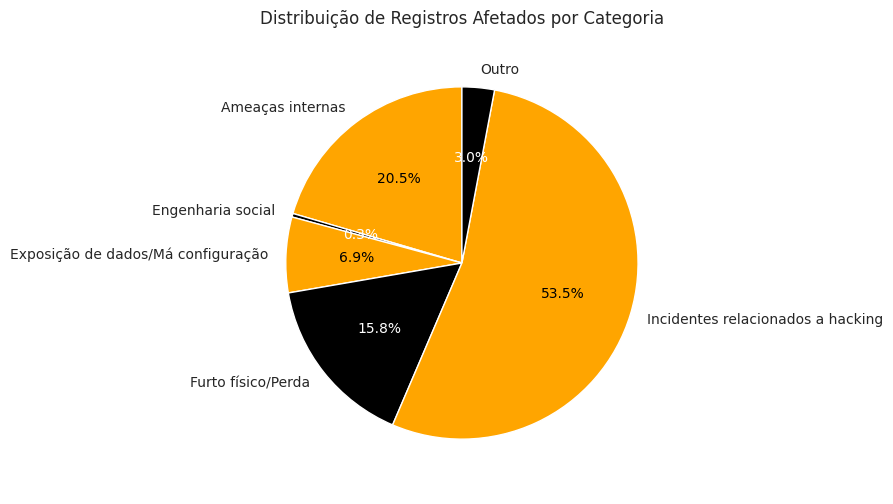

In [ ]:
# Total de registros afetados por categoria
registros_categoria = df.groupby('categoria')['Records'].count()

# Define as cores laranja e preto
cores = ['orange', 'black'] * (len(registros_categoria) // 2 + 1)

plt.figure(figsize=(5, 6))
wedges, texts, autotexts = plt.pie(registros_categoria, labels=registros_categoria.index, autopct='', startangle=90, colors=cores[:len(registros_categoria)])

# Adiciona as porcentagens manualmente e ajusta a cor do texto
for i, a in enumerate(autotexts):
    porcentagem = f'{(registros_categoria[i] / registros_categoria.sum()) * 100:.1f}%'  # Formatação da porcentagem
    a.set_text(porcentagem)  # Define apenas a porcentagem

    # Define a cor do texto com base na cor da fatia
    if cores[i] == 'black':
        a.set_color('white')  # Para a fatia preta, texto branco
    else:
        a.set_color('black')  # Para a fatia laranja, texto preto

plt.title('Distribuição de Registros Afetados por Categoria')
plt.axis('equal')  # Faz o gráfico de pizza ser um círculo
plt.show()


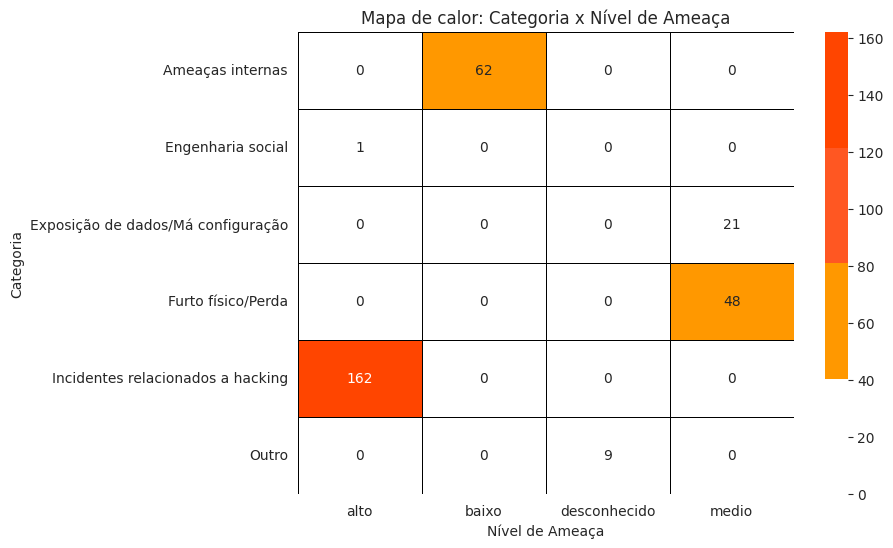

In [ ]:
# Tabela de frequência: categoria x nível de ameaça
categoria_nivel_ameaca = df.groupby(['categoria', 'nivel_ameaca']).size().unstack(fill_value=0)

# Mapa de calor com tons de laranja
plt.figure(figsize=(8, 6))
cmap = sns.color_palette(["white", "#FF9800", "#FF5722", "#FF4500"], as_cmap=True)  # Tons de laranja
sns.heatmap(categoria_nivel_ameaca, annot=True, cmap=cmap, fmt='g', linewidths=0.5, linecolor='black')  # Borda preta
plt.title('Mapa de calor: Categoria x Nível de Ameaça')
plt.xlabel('Nível de Ameaça')
plt.ylabel('Categoria')
plt.show()
